# HW 4 - Assignment 2

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

#plus importing scipy.stats
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
#generate the distribution
dist_n = np.random.randn(1000)

#KS and Anderson Darling tests
print "normal on normal KS test", scipy.stats.kstest(dist_n,'norm')
print "normal on normal Anderson Darling test", scipy.stats.anderson(dist_n, dist='norm')
print "" 

dist_b = np.random.binomial(1, 0.5, 1000)

print "Binomial on normal KS test", scipy.stats.kstest(dist_b,'norm')
print "Binomial on normal Anderson Darling test", scipy.stats.anderson(dist_b, dist='norm')
threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]
print 'Threshold = ', threshold

##what is this threshold I am saving??

normal on normal KS test (0.028011268886006246, 0.40872343930700739)
normal on normal Anderson Darling test (0.50193442984038938, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

Binomial on normal KS test (0.5, 0.0)
Binomial on normal Anderson Darling test (179.78728960431158, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
Threshold =  [ 1.088]


In [3]:
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
#notice the extra comma on the left side of the '=' sign: that tells numpy take the first two values returned, and throw away the rest


In [4]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
print "Normal on normal", scipy.stats.entropy(distpdf_n, scipy.stats.norm.pdf(bincenters_n))  
print "Binomial on normal", scipy.stats.entropy(distpdf_b, scipy.stats.norm.pdf(bincenters_b))

#you can interpret this as a distance: it increases as the distributions diverge

Normal on normal 0.00746752973376
Binomial on normal 1.68880775213


## BINOMIAL

In [5]:
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))


def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

p=0.5
for i,n in enumerate(narray):
    p=0.1 
    dist = np.random.binomial(n, p, 1000)
    #KS and AD tests
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    #KL test
    mybins=np.linspace(min(dist),max(dist), 10)
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))

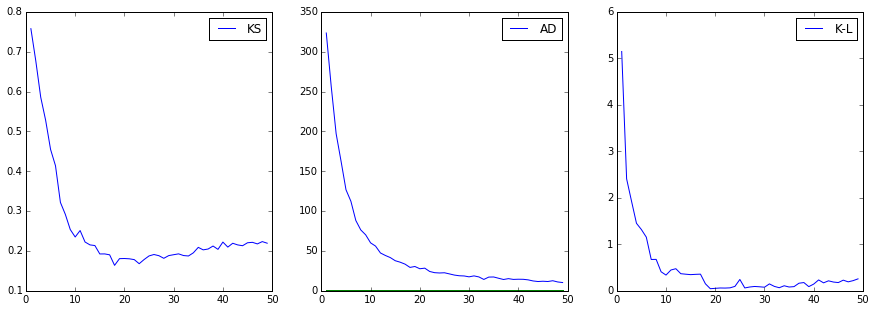

In [6]:

fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

From the above graphs we see that the goodness of fit increases with the increase in the number of trials.

## POISSON

In [7]:
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))

for i,n in enumerate(narray):
    p=0.1
    dist = np.random.poisson(n, 1000)
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n, n))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
        
    mybins = np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
 
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))

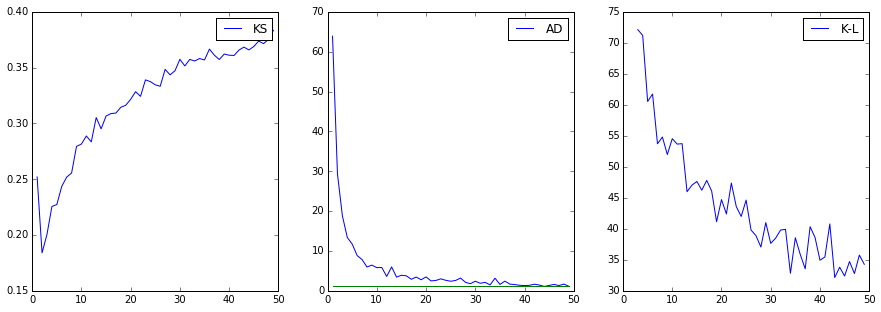

In [8]:

fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

For the KS statistic, the goodness of fit decreases with an increase in the number of trials. For AD and KL the goodness of fit increaes with an increase in the number of trials.

### TOTALLY OPTIONAL fun with KL: the KL divergence is a measure of how much approximation you have to do to represent one distribution with the other. you can see what it looks point by point, before you integrate and get a single distance number

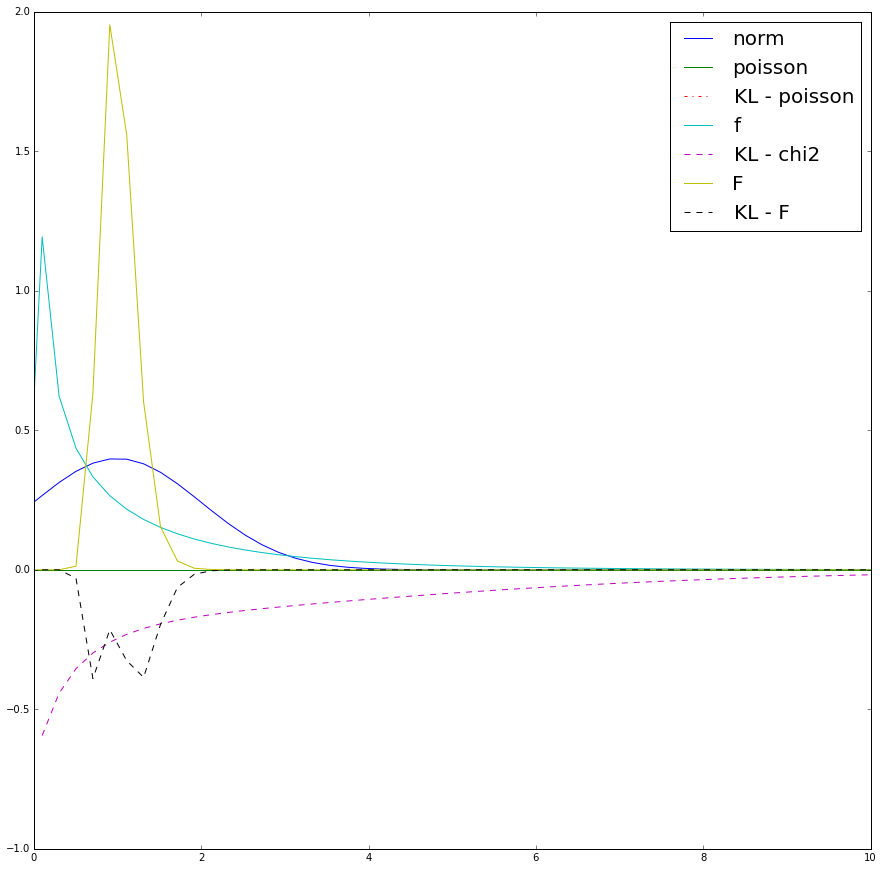

In [9]:
pl.figure(figsize=(15,15))

p = lambda x, mu : scipy.stats.distributions.poisson.pmf(x,mu)
q = lambda x, mu : scipy.stats.distributions.norm.pdf(x-mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  p(x, mu)* np.log10(q(x, mu)) + p(x, mu) *np.log10(p(x, mu))

def model(x) : 
    return 1./(s*np.sqrt(2*np.pi))*exp(-((x-m)/2./2./s)**2)

x=np.linspace(-10,10,100)
pl.plot(x, q(x,1), label='norm')
pl.plot(x, p(x,1), label='poisson')
pl.plot(x, Dkl(x, 1, p), '-.', label = 'KL - poisson')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))


pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')



#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))


pl.plot(x, f(x,1), label='F')
pl.plot(x,Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(0,10)
pl.legend( fontsize = 20)